In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://cb.lk/covid_19

--2022-08-29 11:49:35--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-08-29 11:49:36--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-08-29 11:49:36--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-08

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

# Load Datasets

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

# **Importing Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **Building Architecture**


In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf

In [ ]:
conv_base = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
)
conv_base.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
# For working with neural networks
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

In [ ]:
conv_base = tf.keras.applications.VGG19(weights='imagenet',
 include_top=False,
 input_shape=(128, 128, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128, 128, 3)))

#model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss='categorical_crossentropy',optimizer = "adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 32)          147488    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 1, 1, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                      

# **Train From Scratch**

## *Data Augmentation*

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


# **Fit The Model**

In [ ]:
pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
filepath = '/content/'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= filepath, 
                                                         save_weights_only=True, save_best_only=True)

In [ ]:
hist =model.fit(train_generator,steps_per_epoch = 7,epochs = 10,validation_data = validation_generator,validation_steps = 2, callbacks= [checkpoint_callback])

Epoch 1/10
7/7 [==============================] - 60s 9s/step - loss: 0.0000e+00 - accuracy: 0.4955 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 46s 7s/step - loss: 0.0000e+00 - accuracy: 0.4911 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 46s 7s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 46s 7s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 46s 7s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 46s 7s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 46s 7s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 -

## *Loss is very less and accuracy is on point*

In [ ]:
model.save("Detection_Covid_19.h5")

In [ ]:
model.evaluate(train_generator)

7/7 [==============================] - 38s 5s/step - loss: 0.0442 - accuracy: 0.9866


[0.0442054346203804, 0.9866071343421936]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 11s 5s/step - loss: 0.0353 - accuracy: 0.9833


[0.03526311367750168, 0.9833333492279053]

# **Test Images**

In [ ]:
model = load_model("Detection_Covid_19.h5")

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **List all data in history**

In [ ]:

history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Summarize history for accuracy**

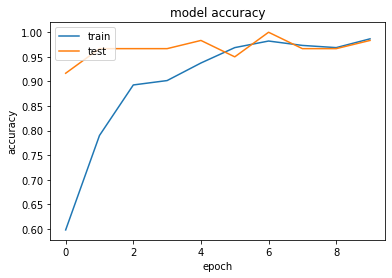

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Summarize history for loss**

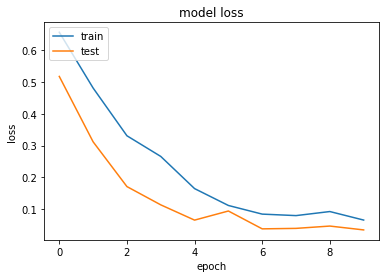

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()